In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse
import tomli
from scipy.optimize import curve_fit

In [2]:
def read_experiment_file(filename):
    metadata = {}
    data = []
    
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Parse metadata
    data_start = None
    for i, line in enumerate(lines):
        if line.strip() == "":
            continue
        
        parts = line.split('\t')
        if len(parts) == 2 and not parts[0].replace('.', '', 1).isdigit():
            key, value = parts
            metadata[key.strip()] = value.strip()
        elif "Current / A" in parts[0]:
            data_start = i + 1
            break
    
    # Read numerical data
    if data_start is not None:
        for line in lines[data_start:]:
            values = line.split('\t')
            if len(values) == 3:
                try:
                    data.append([float(v) for v in values])
                except ValueError:
                    continue  # Skip malformed lines
    
    df = pd.DataFrame(data, columns=["Current (A)", "Voltage (uV)", "Time (s)"])
    
    return metadata, df

In [3]:
def sigmoid(x):
     return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x))) 

In [4]:
def discontinous(x,a,b,c,d,n):
    y = x-b
    return a*x+c + d*sigmoid(y/2)*np.abs(y)**np.clip(n, -10, 10)

In [5]:
sample_length = 0.00205
print(sample_length)

0.00205


In [6]:
#the function I'm supposed to use I guess
Ec = 100

def critical(x,Ic,n):
    return (Ec)*np.abs(x/Ic)**n

In [18]:
def plot_E_field(cur, E_field, savefig,name,ax=None):


    p0 = [20 ,(5/3)*np.mean(cur), -2000, 0.000, 8]
    if ax is not None:
       ax = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    popt, pcov = curve_fit(discontinous, cur, E_field,p0=p0,bounds=([20, 10, -2000, 0, 3.5],[60, 70, -950, 1, 8]))


    #calcualte background resistance
    E_field_removed = E_field -(popt[0]*cur+popt[2])

    plt.plot(cur,E_field_removed/(10**6))
    #dividing my 10**6 to converts to v/m
    p0=[0,10]

    popt, pcov = curve_fit(critical, cur, E_field_removed,bounds =([0,0],[100,50]))

    print(popt)

    plt.plot(cur, critical(cur,*popt)/(10**6), label="Fitted Curve", color="blue")


    plt.xlabel("Current (Amps)")
    plt.ylabel("E_field (V/m)")
    if savefig:
        plt.savefig(os.getcwd() + "/" + name)
    return ax

Voltage is given in micro volts
Current is given in amps
dividing by the distance which is 0.00205 meters
gives the electic field which is in micro V/m
the Ec is given in micro V/m
Therefore E/Ec is dimensionless

[65.31758667 22.83708647]
[59.72211669 19.72622872]
[48.27576473 16.15987582]
[37.06845108 14.22679392]
[27.79968454 12.27624684]
[24.40496663 12.18727958]
[22.38062048 12.15558983]
[20.86076654 12.09182809]


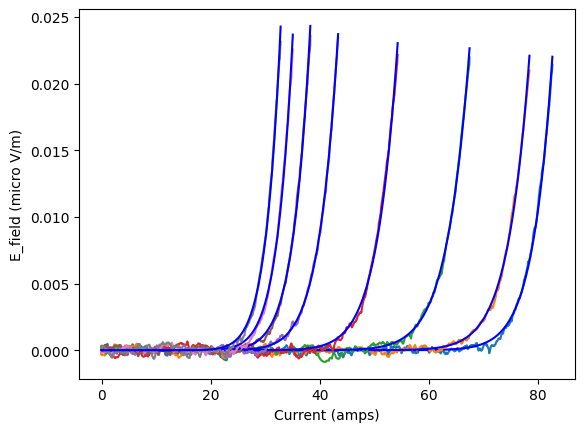

In [19]:
tesla_values = [0,0.025,0.05,0.1,0.2,0.3,0.4,0.5]
current_values = []
voltage_values  = []
E_field_values = []
for i, tesla in enumerate(tesla_values):
    metadata, df = read_experiment_file(f"data/Ic_data_{tesla:.3g}T.txt")
    current = df["Current (A)"].to_numpy()
    voltage = df["Voltage (uV)"].to_numpy()
    current_values.append(current)
    voltage_values.append(voltage)
    E_field_values.append(voltage/sample_length)


for i, tesla in enumerate(tesla_values):
    plot_E_field(current_values[i],E_field_values[i],0,"plot_1")




[66.63138329 24.04351088]
[63.0932484  21.60410274]
[55.27313345 18.87451042]
[41.14263934 14.04691745]
[29.62926197 11.82427824]
[24.59976775 11.41869925]
[21.31570139 11.14495294]
[19.12168721 11.11135314]


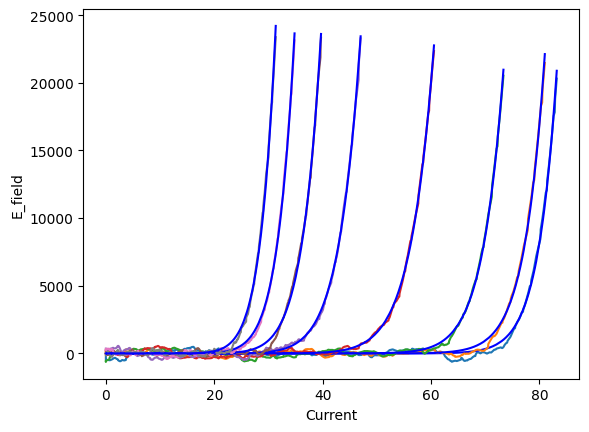

In [10]:
tesla_values = [0,0.025,0.05,0.1,0.2,0.3,0.4,0.5]
current_values = []
voltage_values  = []
E_field_values = []
for i, tesla in enumerate(tesla_values):
    metadata, df = read_experiment_file(f"data/Ic_data_45_{tesla:.3g}T.txt")
    current = df["Current (A)"].to_numpy()
    voltage = df["Voltage (uV)"].to_numpy()
    current_values.append(current)
    voltage_values.append(voltage)
    E_field_values.append(voltage/sample_length)

for i, tesla in enumerate(tesla_values):
    plot_E_field(current_values[i],E_field_values[i],0,"plot_1")

[65.3273068  23.22204471]
[63.83990826 22.7635621 ]
[60.94615913 22.09632627]
[54.330424   19.73501242]
[45.81734658 17.9693043 ]
[41.06139943 18.54327134]
[35.47871219 16.29134848]
[31.79179828 15.58532224]


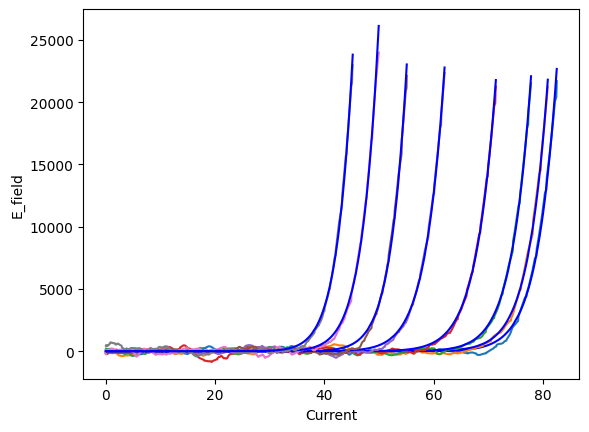

In [11]:
tesla_values = [0,0.025,0.05,0.1,0.2,0.3,0.4,0.5]
current_values = []
voltage_values  = []
E_field_values = []
for i, tesla in enumerate(tesla_values):
    metadata, df = read_experiment_file(f"data/Ic_data_90_{tesla:.3g}T.txt")
    current = df["Current (A)"].to_numpy()
    voltage = df["Voltage (uV)"].to_numpy()
    current_values.append(current)
    voltage_values.append(voltage)
    E_field_values.append(voltage/sample_length)

for i, tesla in enumerate(tesla_values):
    plot_E_field(current_values[i],E_field_values[i],0,"plot_1")
